<a href="https://colab.research.google.com/github/jmparradov/MachineLearning_Project/blob/dev_jonathan/Machine_Learning_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Importación de liberías

In [2]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

from google.colab import drive
import os

# Funciones externas
# ==============================================================================

from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/PrimerSemestre/MachineLearning
from utils.funciones import multiple_plot





Mounted at /content/drive
/content/drive/MyDrive/PrimerSemestre/MachineLearning


#2. Extracción de datos

In [3]:
url = 'https://raw.githubusercontent.com/jmparradov/MachineLearning_Project/refs/heads/main/datos_ruido_areametropolitana.csv'

df = pd.read_csv(url)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66456 entries, 0 to 66455
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   est       66456 non-null  object 
 1   BEL-ALCA  0 non-null      float64
 2   BEL-USBV  5148 non-null   float64
 3   CEN-TRAF  36861 non-null  float64
 4   GIR-BOTJ  54247 non-null  float64
 5   GIR-SOSN  15745 non-null  float64
 6   ITA-ACUA  34312 non-null  float64
 7   ITA-CODI  15164 non-null  float64
 8   ITA-SAMA  35604 non-null  float64
 9   MED-PJIC  17845 non-null  float64
 10  MED-PJIR  29557 non-null  float64
 11  MED-PLMA  13958 non-null  float64
 12  MED-SIAT  50069 non-null  float64
 13  MED-UNFM  0 non-null      float64
 14  MED-ZOOL  39377 non-null  float64
 15  SAB-SEMS  49006 non-null  float64
dtypes: float64(15), object(1)
memory usage: 8.1+ MB


#3. Formato y transformación de los datos

In [4]:
# prompt: find and give format to est column in df "1/1/17 0:00"

df['est'] = pd.to_datetime(df['est'], format='%m/%d/%y %H:%M')

id_vars = ['est']
value_vars = [col for col in df.columns if col not in id_vars]

d = pd.melt(df, id_vars=id_vars, value_vars=value_vars, var_name='location', value_name='noise_values')

# Extraer año, mes, semana del año, día del mes, número de semana, día de la semana y hora
d['year'] = d['est'].dt.year
d['month'] = d['est'].dt.month
d['day_of_month'] = d['est'].dt.day
d['week_number'] = d['est'].dt.isocalendar().week
d['day_of_week'] = d['est'].dt.dayofweek  # 0 = Monday, 6 = Sunday
d['hour'] = d['est'].dt.hour
d['day_month'] = d['est'].dt.strftime('%d-%m')

d.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 996840 entries, 0 to 996839
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   est           996840 non-null  datetime64[ns]
 1   location      996840 non-null  object        
 2   noise_values  396893 non-null  float64       
 3   year          996840 non-null  int32         
 4   month         996840 non-null  int32         
 5   day_of_month  996840 non-null  int32         
 6   week_number   996840 non-null  UInt32        
 7   day_of_week   996840 non-null  int32         
 8   hour          996840 non-null  int32         
 9   day_month     996840 non-null  object        
dtypes: UInt32(1), datetime64[ns](1), float64(1), int32(5), object(2)
memory usage: 54.2+ MB


#4. Limpieza de datos

In [5]:
#Verificación de registros duplicados
d.loc[d.duplicated()]

,est,location,noise_values,year,month,day_of_month,week_number,day_of_week,hour,day_month


In [6]:
# eliminación de registros duplicados
d = d.drop_duplicates()

# Remove rows where 'noise_values' is NaN
d = d.dropna(subset=['noise_values'])

#Reiniciar el indice
d.reset_index(drop=True, inplace=True)

#5. Visualización de datos

In [7]:
#Lista de variables categóricas
catCols = d.select_dtypes(include = ["object", 'category']).columns.tolist()

d[catCols].head(2)

,location,day_month
0,BEL-USBV,23-11
1,BEL-USBV,23-11


In [8]:
#Lista de variables numéricas

numCols=d.select_dtypes(include = ['float64','int32','int64', 'UInt32']).columns.tolist()
d[numCols].head()

,noise_values,year,month,day_of_month,week_number,day_of_week,hour
0,56.0,2023,11,23,47,3,16
1,53.8,2023,11,23,47,3,17
2,52.9,2023,11,23,47,3,18
3,52.4,2023,11,23,47,3,19
4,51.1,2023,11,23,47,3,20


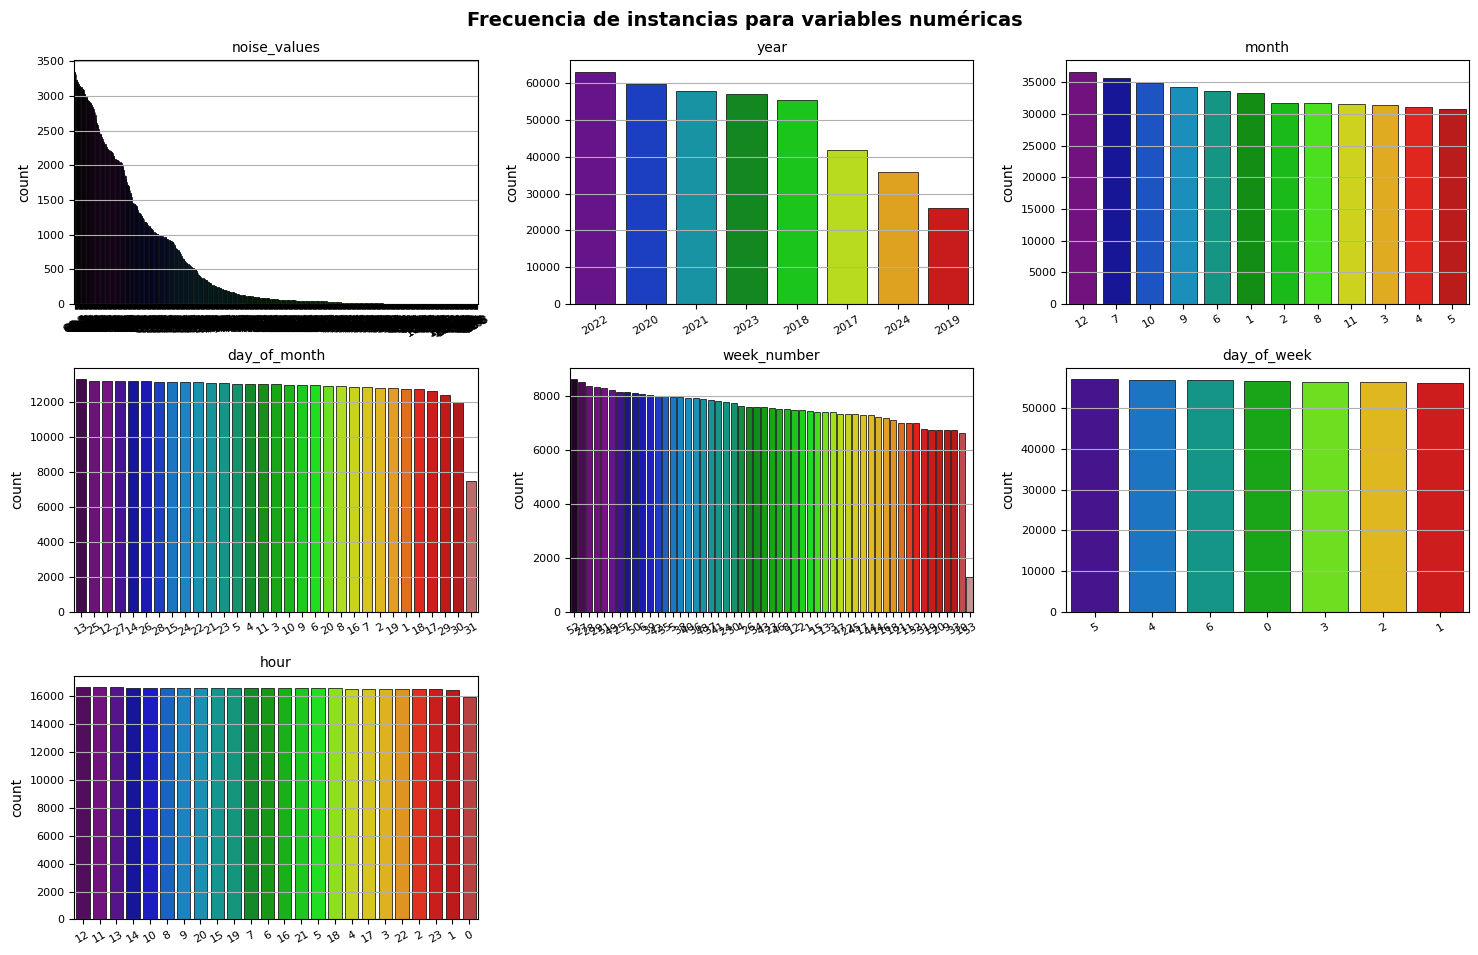

In [9]:
#Visualización de frecuencia de instancias para variables numéricas
multiple_plot(3, d , numCols, None, 'countplot', 'Frecuencia de instancias para variables numéricas',30)

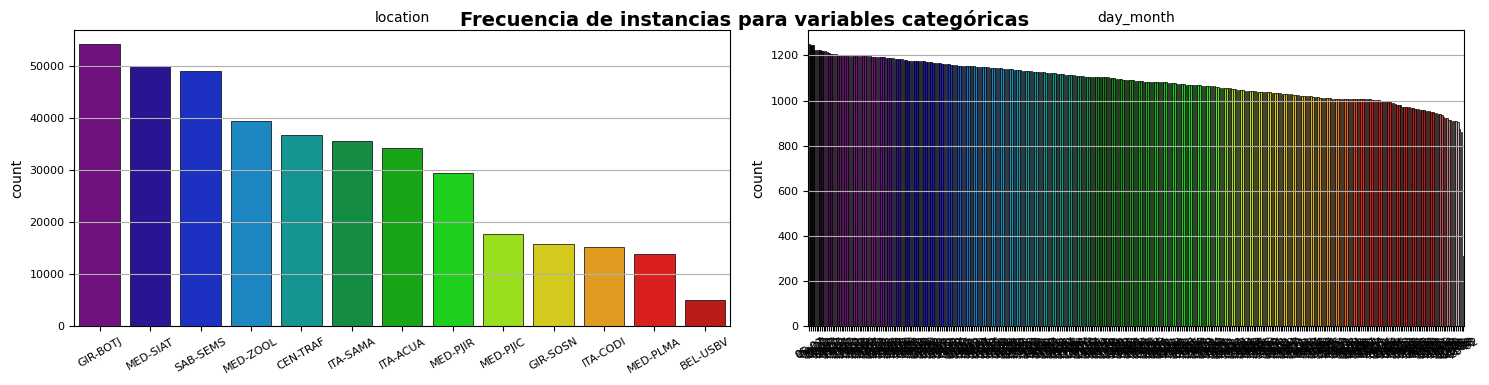

In [10]:
# Visualización de frencuencia de instancias para variables categóricas
multiple_plot(2, d , catCols, None, 'countplot', 'Frecuencia de instancias para variables categóricas',30)

In [11]:
# Filtrar los datos para dejar los años de interés 2021-2023, y evitar información dentro del rango del COVID y el presente año
d = d[d['year'].isin([2023,2022,2021,2020])]

# Print the filtered DataFrame
print(d)

                       est  location  noise_values  year  month  day_of_month  \
0      2023-11-23 16:00:00  BEL-USBV          56.0  2023     11            23   
1      2023-11-23 17:00:00  BEL-USBV          53.8  2023     11            23   
2      2023-11-23 18:00:00  BEL-USBV          52.9  2023     11            23   
3      2023-11-23 19:00:00  BEL-USBV          52.4  2023     11            23   
4      2023-11-23 20:00:00  BEL-USBV          51.1  2023     11            23   
...                    ...       ...           ...   ...    ...           ...   
392299 2023-12-31 19:00:00  SAB-SEMS          65.8  2023     12            31   
392300 2023-12-31 20:00:00  SAB-SEMS          66.6  2023     12            31   
392301 2023-12-31 21:00:00  SAB-SEMS          66.8  2023     12            31   
392302 2023-12-31 22:00:00  SAB-SEMS          68.3  2023     12            31   
392303 2023-12-31 23:00:00  SAB-SEMS          67.4  2023     12            31   

        week_number  day_of

In [12]:
#Revisamos los distintos puntos de medición qué quedaron.
d["location"].unique()

array(['BEL-USBV', 'CEN-TRAF', 'GIR-BOTJ', 'ITA-ACUA', 'ITA-SAMA',
       'MED-PJIR', 'MED-SIAT', 'MED-ZOOL', 'SAB-SEMS'], dtype=object)

In [13]:
d = d[d['location'].isin(['CEN-TRAF', 'GIR-BOTJ', 'ITA-ACUA',
       'ITA-SAMA', 'MED-PJIR',
       'MED-SIAT', 'MED-ZOOL', 'SAB-SEMS'])]

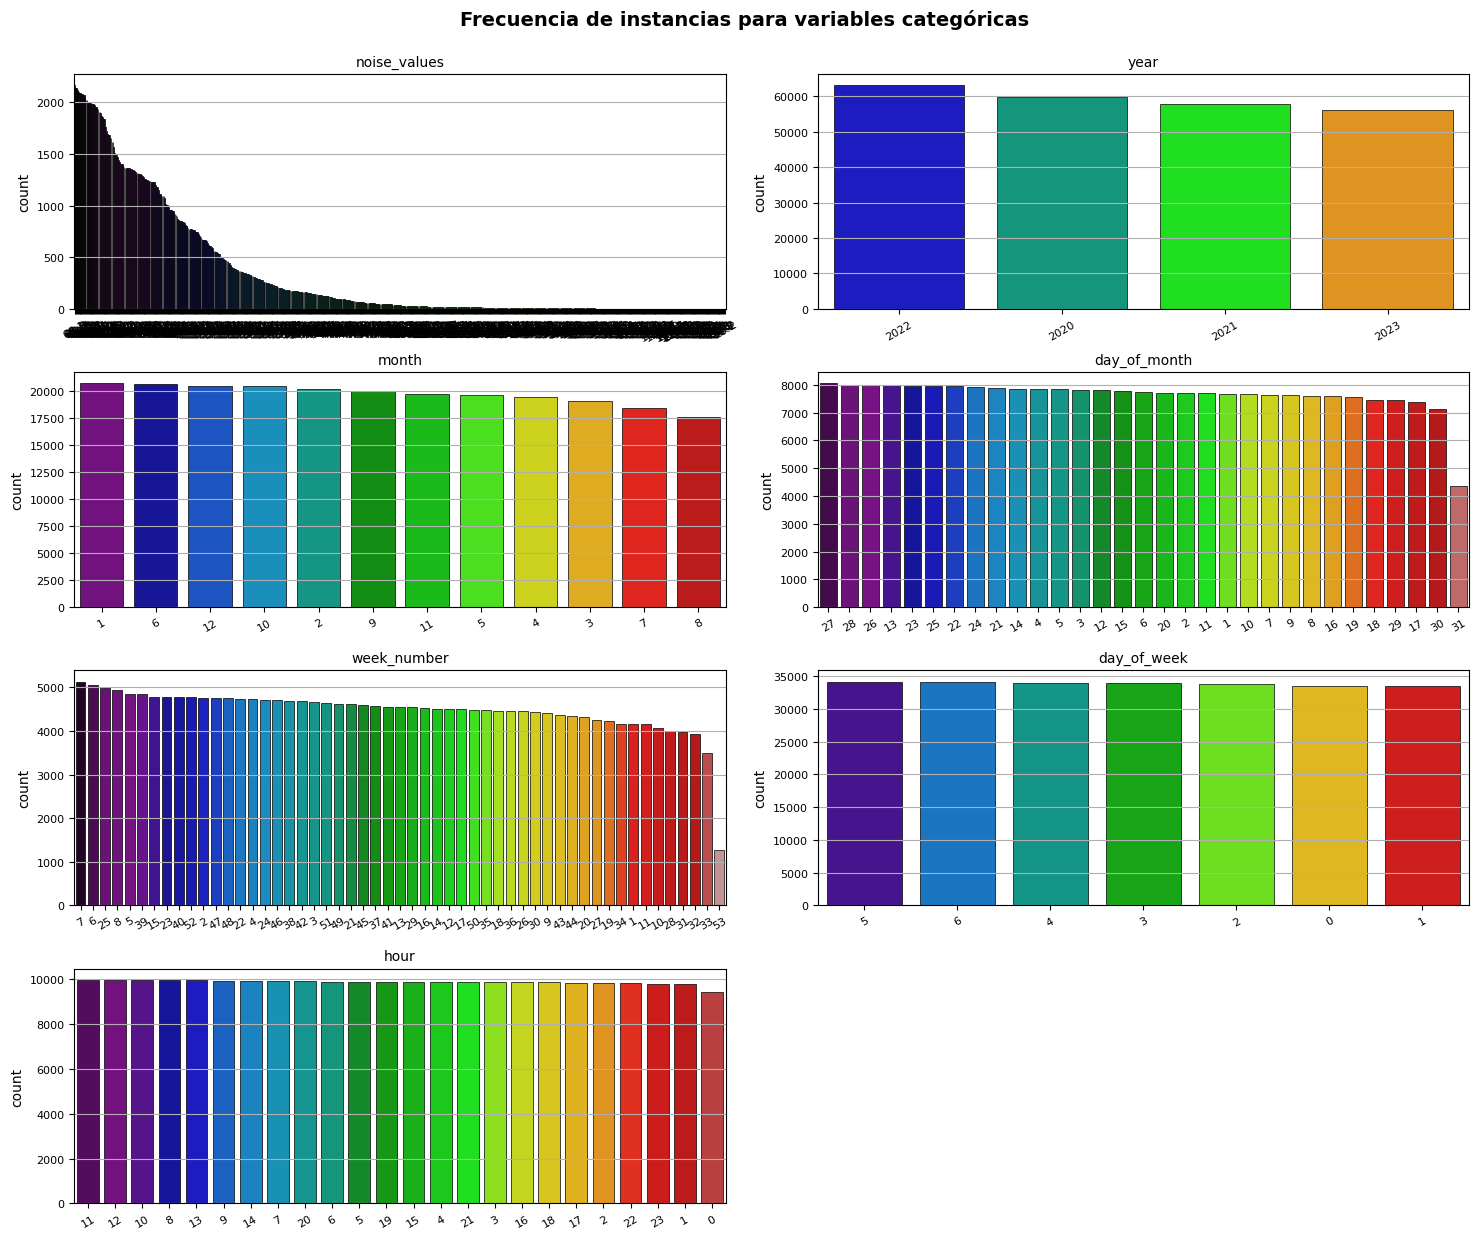

In [14]:
# Visualización de frencuencia de instancias para variables categóricas
multiple_plot(2, d , numCols, None, 'countplot', 'Frecuencia de instancias para variables categóricas',30)

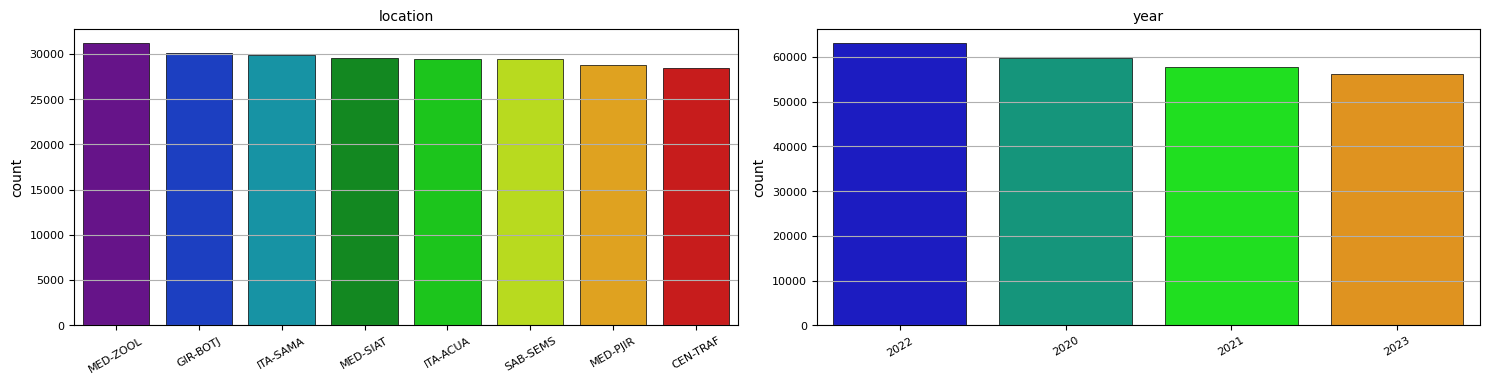

In [15]:
# Visualización de frencuencia de instancias para variables categóricas
multiple_plot(2, d , ['location', 'year'], None, 'countplot', '',30)

In [16]:

Q1 = d['noise_values'].quantile(0.25)
Q3 = d['noise_values'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

d_no_outliers = d[(d['noise_values'] >= lower_bound) & (d['noise_values'] <= upper_bound)]

print(f"Number of rows before removing outliers: {len(d)}")
print(f"Number of rows after removing outliers: {len(d_no_outliers)}")

Number of rows before removing outliers: 236850
Number of rows after removing outliers: 227836


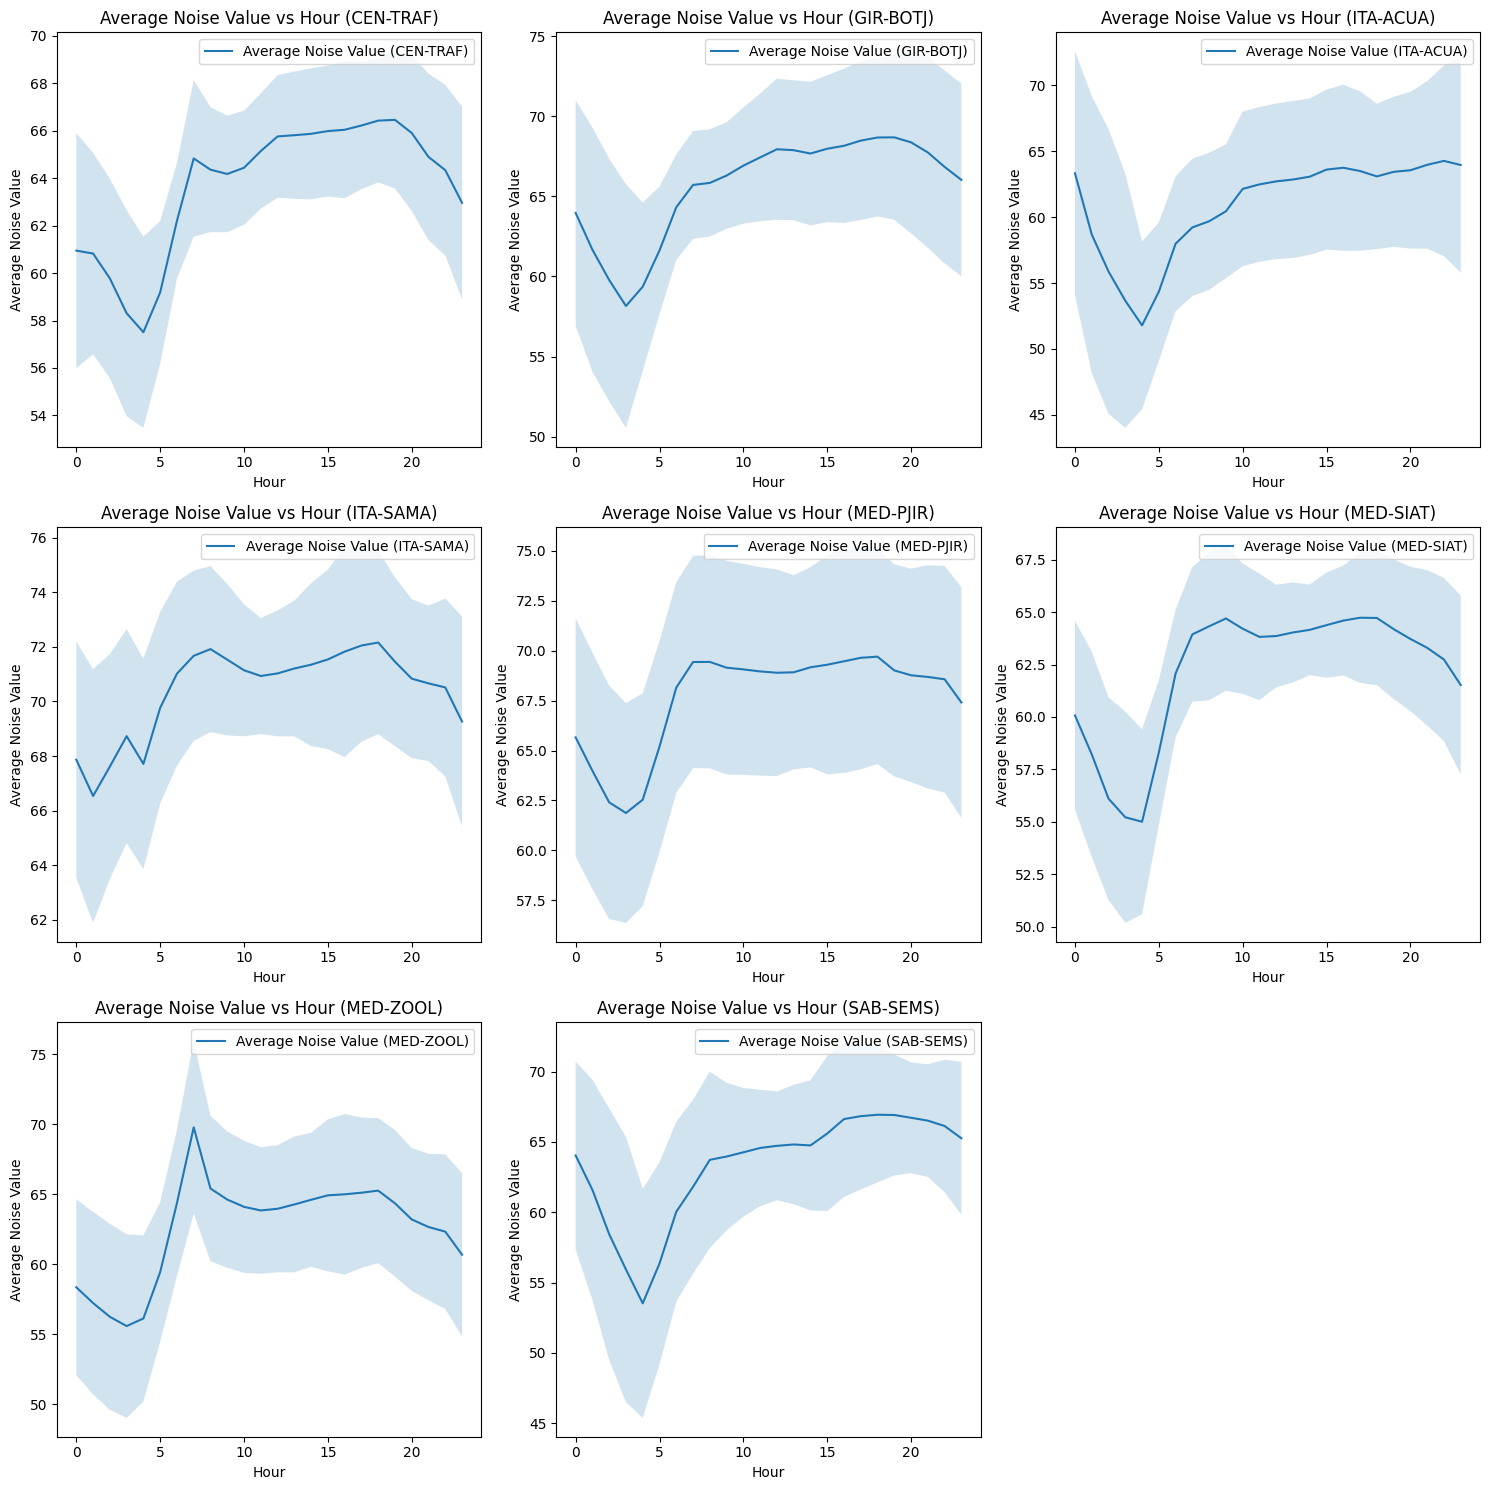

In [17]:
# Group by location, hour, and calculate the mean and standard deviation of noise_value
grouped_data = d.groupby(['location', 'hour'])['noise_values'].agg(['mean', 'std'])

# Reset the index to make location and hour regular columns
grouped_data = grouped_data.reset_index()

# Create subplots for each location
num_locations = len(grouped_data['location'].unique())
rows = (num_locations + 2) // 3  # Calculate the number of rows needed for 3 subplots per row
fig, axes = plt.subplots(rows, 3, figsize=(15, 5 * rows))
axes = axes.flatten()  # Flatten the axes array for easier iteration


for i, location in enumerate(grouped_data['location'].unique()):
  location_data = grouped_data[grouped_data['location'] == location]
  ax = axes[i]

  # Plot the average noise_value vs hour
  ax.plot(location_data['hour'], location_data['mean'], label=f'Average Noise Value ({location})')

  # Fill the area around the average with the standard deviation
  ax.fill_between(location_data['hour'], location_data['mean'] - location_data['std'],
                  location_data['mean'] + location_data['std'], alpha=0.2)

  ax.set_xlabel('Hour')
  ax.set_ylabel('Average Noise Value')
  ax.set_title(f'Average Noise Value vs Hour ({location})')
  ax.legend()


# Remove any unused subplots
for j in range(i + 1, len(axes)):
  fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

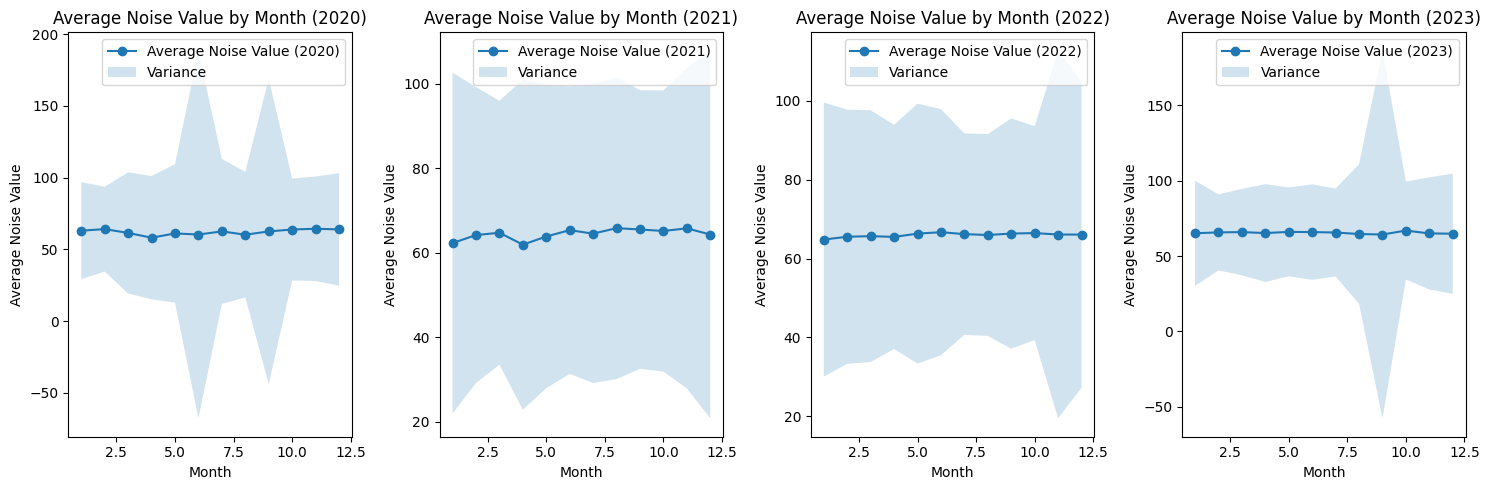

In [18]:
# prompt: plot avergae nouse_value by  month using a year as each subplot, in a row of subplots, include variance as a area surouding the average value

import matplotlib.pyplot as plt

# Assuming 'd' is your DataFrame
# Group by year, month, and calculate the average noise_value
average_noise_by_month = d.groupby(['year', 'month'])['noise_values'].mean().unstack()

# Calculate the variance for each year and month
variance_noise_by_month = d.groupby(['year', 'month'])['noise_values'].var().unstack()

# Create subplots for each year
fig, axes = plt.subplots(1, len(average_noise_by_month.index), figsize=(15, 5))

for i, year in enumerate(average_noise_by_month.index):
  ax = axes[i]

  # Plot the average noise_value for each month
  ax.plot(average_noise_by_month.columns, average_noise_by_month.loc[year], marker='o', label=f'Average Noise Value ({year})')

  # Fill the area around the average with the variance
  ax.fill_between(average_noise_by_month.columns,
                  average_noise_by_month.loc[year] - variance_noise_by_month.loc[year],
                  average_noise_by_month.loc[year] + variance_noise_by_month.loc[year],
                  alpha=0.2, label='Variance')

  ax.set_xlabel('Month')
  ax.set_ylabel('Average Noise Value')
  ax.set_title(f'Average Noise Value by Month ({year})')
  ax.legend()

plt.tight_layout()
plt.show()


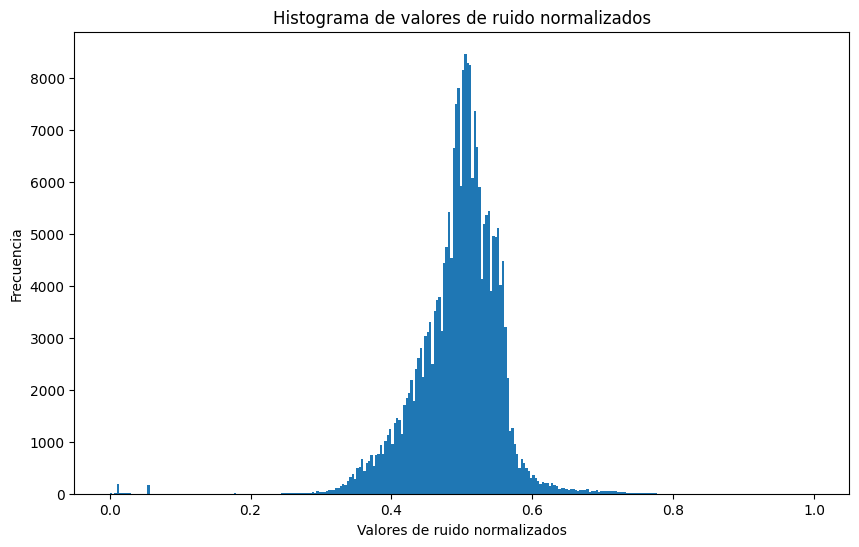

In [19]:
# prompt: puedes intentar normalizar la columna "noise_values" y mostrarlo en un histograma

from sklearn.preprocessing import MinMaxScaler

# Crear un objeto MinMaxScaler
scaler = MinMaxScaler()

# Ajustar y transformar la columna 'noise_values'
d['noise_values_normalized'] = scaler.fit_transform(d[['noise_values']])

# Mostrar un histograma de la columna normalizada
plt.figure(figsize=(10, 6))
plt.hist(d['noise_values_normalized'], bins=300)
plt.xlabel('Valores de ruido normalizados')
plt.ylabel('Frecuencia')
plt.title('Histograma de valores de ruido normalizados')
plt.show()

In [20]:
d.head(10)

,est,location,noise_values,year,month,day_of_month,week_number,day_of_week,hour,day_month,noise_values_normalized
8829,2020-01-01 00:00:00,CEN-TRAF,58.5,2020,1,1,1,2,0,01-01,0.441489
8830,2020-01-01 01:00:00,CEN-TRAF,60.4,2020,1,1,1,2,1,01-01,0.458333
8831,2020-01-01 02:00:00,CEN-TRAF,54.2,2020,1,1,1,2,2,01-01,0.403369
8832,2020-01-01 03:00:00,CEN-TRAF,53.6,2020,1,1,1,2,3,01-01,0.398050
8833,2020-01-01 04:00:00,CEN-TRAF,51.6,2020,1,1,1,2,4,01-01,0.380319
8834,2020-01-01 05:00:00,CEN-TRAF,52.6,2020,1,1,1,2,5,01-01,0.389184
8835,2020-01-01 06:00:00,CEN-TRAF,53.5,2020,1,1,1,2,6,01-01,0.397163
8836,2020-01-01 07:00:00,CEN-TRAF,54.8,2020,1,1,1,2,7,01-01,0.408688
8837,2020-01-01 08:00:00,CEN-TRAF,54.3,2020,1,1,1,2,8,01-01,0.404255
8838,2020-01-01 09:00:00,CEN-TRAF,55.0,2020,1,1,1,2,9,01-01,0.410461


In [21]:
from scipy.stats import pearsonr
from scipy import stats
import math

#Separar los datos entrenamiento y prueba
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate


#Escalar Variables
from sklearn.preprocessing import MinMaxScaler

#Evaluación del modelo
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error

#Creación de modelo
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree



In [22]:
dresp = d.copy()
d['location'].unique()


array(['CEN-TRAF', 'GIR-BOTJ', 'ITA-ACUA', 'ITA-SAMA', 'MED-PJIR',
       'MED-SIAT', 'MED-ZOOL', 'SAB-SEMS'], dtype=object)

In [23]:


location_mapping = {
    'CEN-TRAF': 0,
    'GIR-BOTJ': 1,
    'ITA-ACUA': 2,
    'ITA-SAMA': 3,
    'MED-PJIR': 4,
    'MED-SIAT': 5,
    'MED-ZOOL': 6,
    'SAB-SEMS': 7
}


# Replace location names with numbers
d['location'] = d['location'].map(location_mapping)


In [24]:

dresp['location'] = dresp['location'].map(location_mapping)

In [25]:
d['location'].unique()

array([0, 1, 2, 3, 4, 5, 6, 7])

In [26]:

dresp['location'].unique()

array([0, 1, 2, 3, 4, 5, 6, 7])

In [27]:
X = d[['location','hour']]
y = d['noise_values']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1),
                                        train_size   = 0.7,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

In [29]:
scaler = MinMaxScaler()
num_vars = ['location','hour']

# Se escalan los valores del dataset entrenamiento y prueba de las columnas numéricas
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])
X_test[num_vars] = scaler.transform(X_test[num_vars])

X_train[num_vars].head(10)

,location,hour
342216,0.857143,0.565217
299546,0.714286,0.173913
232158,0.571429,0.956522
80264,0.142857,0.739130
186706,0.428571,0.000000
28864,0.000000,0.739130
15836,0.000000,0.347826
89161,0.142857,0.826087
138661,0.285714,0.304348
17050,0.000000,0.956522


In [30]:
dTreeR = DecisionTreeRegressor(
            max_depth         = 7,
            random_state      = 123
          )

# Entrenamiento del modelo
# ------------------------------------------------------------------------------
dTreeR.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=7, random_state=123)

In [31]:
print('Training:', dTreeR.score(X_train,y_train))
print('Test    :',r2_score(y_test,dTreeR.predict(X_test)))

Training: 0.4175051021531573
Test    : 0.40856326600661674


In [32]:
#Se reasigna los datos de entrada 'X' y salida 'y'
#X = d.drop(columns = ["noise_values", "est", "day_month", "year"])
#y = d['noise_values']

#Nuevamente se asigna a 'X_Completo' y 'y_Completo' los datos entrada y salida respectivamente
X_Completo = X
y_Completo = y

In [33]:
X_Completo[num_vars] = scaler.fit_transform(X_Completo[num_vars])

X_Completo[num_vars].head(2)

,location,hour
8829,0.0,0.000000
8830,0.0,0.043478


In [34]:
X_Completo.head(2)

,location,hour
8829,0.0,0.000000
8830,0.0,0.043478


In [35]:
#Se crea una instancia de una DecisionTreeRegressor
modelTreeR = DecisionTreeRegressor()

CV = 10

#Se establecen los hiperparámetros
parameters = {'max_depth': [2, 4, 6, 8, 10],
              'min_samples_split': [15, 30, 45, 60],
              'min_samples_leaf' : [15, 30, 45, 60],
              'max_features' : ['auto', 'sqrt', 'log2']
             }

# Se define un GridSearchCV con una validacion cruzada de 10 pliegues y con todos los
#hierparametros establecidos anteriormente
grid_TreeR = GridSearchCV(
                          modelTreeR,
                          param_grid=parameters,
                          cv=CV,
                          verbose=3)

#Se entrena el GridSearchCV anterior (2 min. aprox.) con los datos completos
grid_TreeR.fit(X_Completo,y_Completo)

Fitting 10 folds for each of 240 candidates, totalling 2400 fits
[CV 1/10] END max_depth=2, max_features=auto, min_samples_leaf=15, min_samples_split=15;, score=nan total time=   0.0s
[CV 2/10] END max_depth=2, max_features=auto, min_samples_leaf=15, min_samples_split=15;, score=nan total time=   0.0s
[CV 3/10] END max_depth=2, max_features=auto, min_samples_leaf=15, min_samples_split=15;, score=nan total time=   0.0s
[CV 4/10] END max_depth=2, max_features=auto, min_samples_leaf=15, min_samples_split=15;, score=nan total time=   0.0s
[CV 5/10] END max_depth=2, max_features=auto, min_samples_leaf=15, min_samples_split=15;, score=nan total time=   0.0s
[CV 6/10] END max_depth=2, max_features=auto, min_samples_leaf=15, min_samples_split=15;, score=nan total time=   0.0s
[CV 7/10] END max_depth=2, max_features=auto, min_samples_leaf=15, min_samples_split=15;, score=nan total time=   0.0s
[CV 8/10] END max_depth=2, max_features=auto, min_samples_leaf=15, min_samples_split=15;, score=nan to

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [2, 4, 6, 8, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [15, 30, 45, 60],
                         'min_samples_split': [15, 30, 45, 60]},
             verbose=3)

In [36]:
resultados = pd.DataFrame(grid_TreeR.cv_results_)
resultados.filter(regex = '(param*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head(4)

,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,mean_test_score,std_test_score
117,6,sqrt,30,30,0.206192,0.140709
135,6,log2,30,60,0.201771,0.129510
128,6,log2,15,15,0.199722,0.122841
171,8,sqrt,45,60,0.199550,0.122754


In [37]:
pd.set_option('display.float_format', lambda x: '%.4f' % x)


# Obtener los resultados del grid search
results_grid_TreeR = pd.DataFrame(grid_TreeR.cv_results_)


# Seleccionar las columnas deseadas
columns_grid_TreeR = ['param_max_depth']  + \
                    ['param_min_samples_split']  + \
                    ['param_min_samples_leaf']  + \
                    ['param_max_features']   + \
                    ['mean_test_score', 'std_test_score']  + \
                    [f'split{i}_test_score' for i in range(CV)]

# Filtrar y mostrar los resultados
results_grid_TreeR_filtered = results_grid_TreeR[columns_grid_TreeR]

# Crear la columna scoreWithStd: f1 / std
results_grid_TreeR_filtered['scoreWithStd'] = results_grid_TreeR_filtered.apply(
    lambda row: row['mean_test_score'] / row['std_test_score'] if row['std_test_score'] != 0 else 0,
    axis=1
)

# Encuentra el índice del máximo valor en la columna scoreWithStd
indice_max_scoreWithStd = results_grid_TreeR_filtered['scoreWithStd'].idxmax()

# Mostrar los scores promedios por cada parámetro
results_grid_TreeR_filtered[['param_max_depth', 'param_min_samples_split', 'param_min_samples_leaf','param_max_features','mean_test_score', 'std_test_score', 'scoreWithStd']]


,param_max_depth,param_min_samples_split,param_min_samples_leaf,param_max_features,mean_test_score,std_test_score,scoreWithStd
0,2,15,15,auto,NaN,NaN,NaN
1,2,30,15,auto,NaN,NaN,NaN
2,2,45,15,auto,NaN,NaN,NaN
3,2,60,15,auto,NaN,NaN,NaN
4,2,15,30,auto,NaN,NaN,NaN
...,...,...,...,...,...,...,...
235,10,60,45,log2,0.1711,0.1387,1.2338
236,10,15,60,log2,0.1807,0.1333,1.3556
237,10,30,60,log2,0.1758,0.1385,1.2692
238,10,45,60,log2,0.1628,0.1327,1.2266


In [38]:
# Se identifican los mejores hiperparámetros
best_params = grid_TreeR.best_params_
print('Best Parameters : ',best_params)

Best Parameters :  {'max_depth': 6, 'max_features': 'sqrt', 'min_samples_leaf': 30, 'min_samples_split': 30}


In [39]:

results_grid_TreeR_filtered.sort_values(by='scoreWithStd', ascending=False).head(3)[
    ['param_max_depth', 'param_min_samples_split', 'param_min_samples_leaf','param_max_features','mean_test_score', 'std_test_score', 'scoreWithStd']]

,param_max_depth,param_min_samples_split,param_min_samples_leaf,param_max_features,mean_test_score,std_test_score,scoreWithStd
136,6,15,45,log2,0.1380,0.0813,1.6971
184,8,15,45,log2,0.1915,0.1157,1.6553
128,6,15,15,log2,0.1997,0.1228,1.6259
